# Analyse et segmentation de clientèle d'un magasin avec campagnes de marketing
### Jules EXBRAYAT & Abdenour MADANI

# Présentation

## Problématique

Quel est le client type de l'entreprise ?

Peut-on créer des groupes de clients, afin de cibler efficacement les potentiels clients et personnalisé la campagne marketing ?

## Jeu de données

### Lecture des données

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
sns.set()

In [6]:
df = pd.read_csv("marketing_campaign.csv", sep="\t", index_col="ID")

### Présentation des variables

In [7]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [8]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 28 variables et 2240 individus.


#### Variables

- ID: identifiant du client
- Year_Birth: numérique, année de naissance du client
- Education: qualitative, niveau d'éducation
- Marital_Status: qualitative, statut marital
- Income: numérique, revenu annuel en $
- Kidhome: numérique, nombre d'enfants en bas-âge
- Teenhome: numérique, nombre d'enfants adolescents
- Dt_Customer: date, date à laquelle le client s'est inscrit
- Recency: numérique, nombre de jours depuis le dernier achat
- Complain: catégorique, est-ce que le client s'est plaint les 2 dernières années (0 ou 1)

#### Products

- MntWines: numérique, argent dépensé les 2 dernières années en vin
- MntFruits: numérique, argent dépensé les 2 dernières années en fruits
- MntMeatProducts: numérique, argent dépensé les 2 dernières années en viande
- MntFishProducts: numérique, argent dépensé les 2 dernières années en poisson
- MntSweetProducts: numérique, argent dépensé les 2 dernières années en bonbons / gâteaux
- MntGoldProds: numérique, argent dépensé les 2 dernières années en bijoux / or

#### Promotion

- NumDealsPurchases: numérique, nombre d'achats effectués avec une promotion
- AcceptedCmp1: catégorique, le client a-t-il acheté durant la campagne promotionnelle numéro 1 (1 s'il a acheté, 0 sinon)
- AcceptedCmp2: pareil pour la campagne numéro 2
- AcceptedCmp3: pareil pour la campagne numéro 3
- AcceptedCmp4: pareil pour la campagne numéro 4
- AcceptedCmp5: pareil pour la campagne numéro 5
- Response: catégorique, 1 si le client a acheté durant la dernière campagne, 0 sinon (potentielle variable à prédire)

#### Place

- NumWebPurchases: numérique, nombre d'achats effectués sur le site Internet
- NumCatalogPurchases: numérique, nombre d'achats effectués via le catalogue
- NumStorePurchases: numérique, nombre d'achats effectués en magasin
- NumWebVisitsMonth: numérique, nombre de visites sur le site Internet le dernier mois


In [9]:
var_numeriques = [
    "Year_Birth",
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
]

In [10]:
var_categoriques = [
    "Education",
    "Marital_Status",
    "Dt_Customer",
    "Complain",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

# Découverte des données

In [12]:
# todo :
# - moyenne, variance, écart type, min max
# - box plot
# - matrice de corrélation

## Visualisation

<Axes: xlabel='Count', ylabel='Marital_Status'>

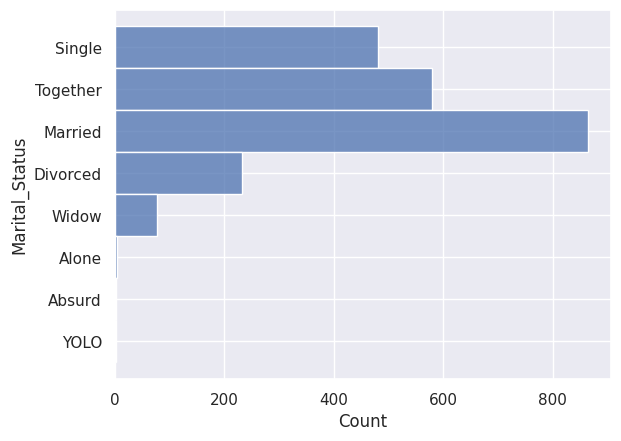

In [13]:
sns.histplot(y=df["Marital_Status"])

In [14]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

<Axes: xlabel='Count', ylabel='Education'>

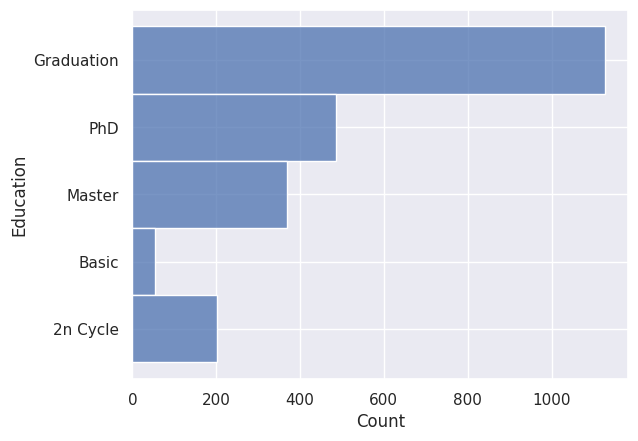

In [15]:
sns.histplot(y=df["Education"])

## A trier

In [16]:
df.nunique()  # nombre de valeurs possibles pour chaque variable

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

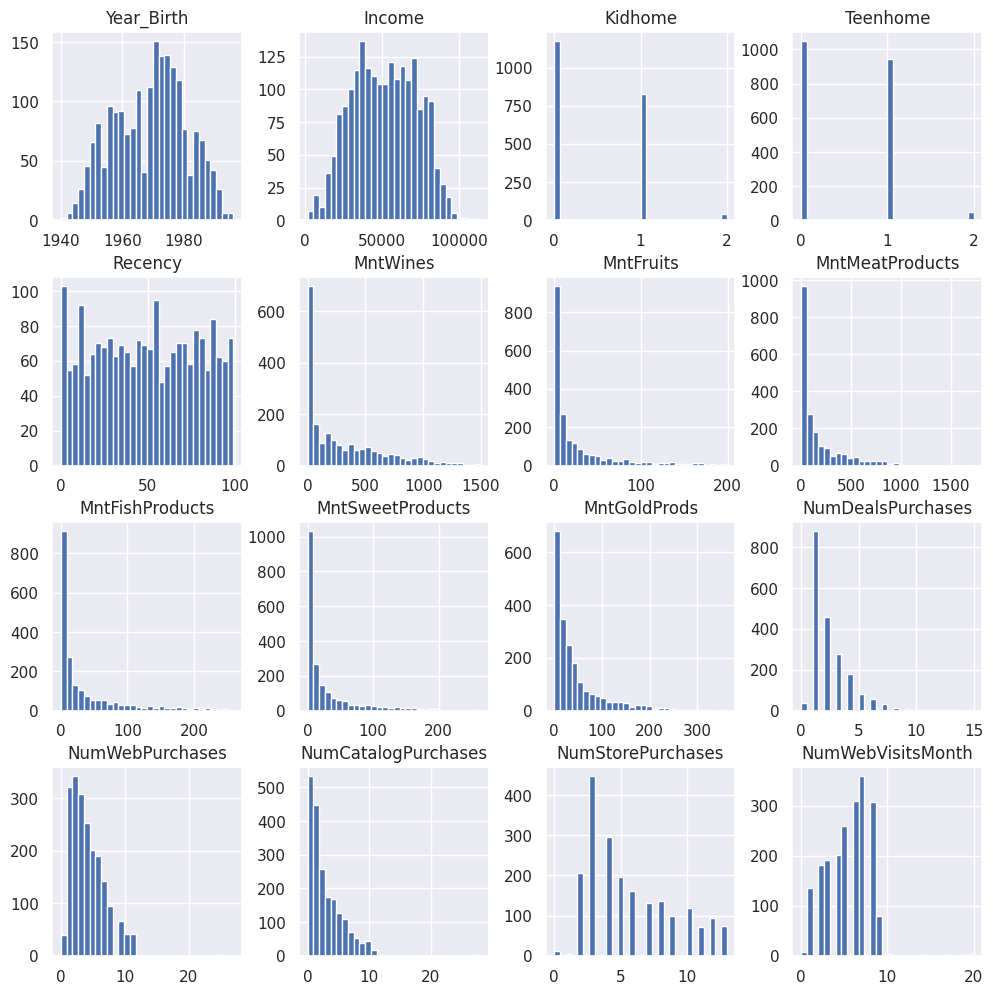

In [93]:
df[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

# Nettoyage des données

## Données parasites


### Variables

Dans le jeu de données, 2 colonnes sont non documentées et contiennent des valeurs constantes :
- `Z_CostContact`
- `Z_Revenue`

**Variable `Z_CostContact`**

In [95]:
print(
    f'Il y a {np.sum(df["Z_CostContact"] == 3)} / 2240 individus pour lesquelles la variable Z_CostContact vaut 3.'
)

plt.hist(df["Z_CostContact"])
plt.show()

KeyError: 'Z_CostContact'

**Variable `Z_Revenue`**

In [94]:
print(
    f'Il y a {np.sum(df["Z_Revenue"] == 11)} / 2240 individus pour lesquelles la variable Z_Revenue vaut 11.'
)

plt.hist(df["Z_Revenue"])
plt.show()

KeyError: 'Z_Revenue'

On décide de les supprimer, car elles sont parasites et ne fournissent pas d'information.

In [20]:
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

### Valeurs

#### Statut marital

<Axes: xlabel='Count', ylabel='Marital_Status'>

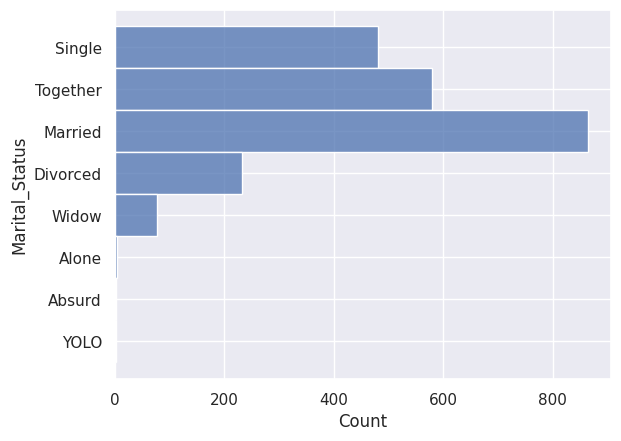

In [21]:
sns.histplot(y=df["Marital_Status"])

Parmi les situations maritales, on observe "absurde" et "YOLO" (You Only Live Once, _on ne vit qu'une fois_).

Comme on ne peut pas déduire ce que veut dire "absurde" dans ce contexte, on se décide de supprimer l'individu.
De même, on suppose que la personne ayant répondu "YOLO", donc ayant répondu de façon humoristique, doit être supprimée du jeu de données.

In [22]:
df.drop(index=df.loc[df["Marital_Status"] == "YOLO"].index, inplace=True)
df.drop(index=df.loc[df["Marital_Status"] == "Absurd"].index, inplace=True)

<Axes: xlabel='Count', ylabel='Marital_Status'>

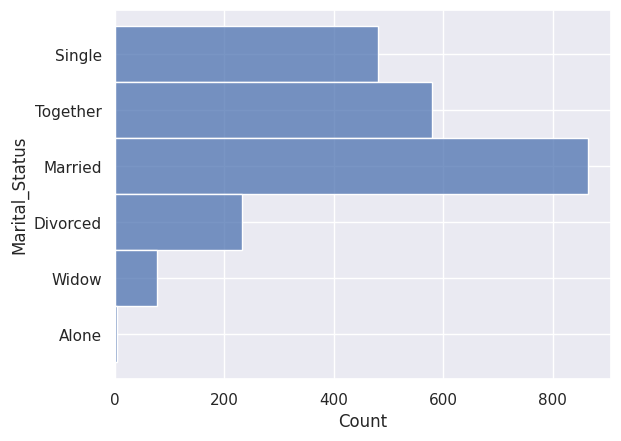

In [23]:
sns.histplot(y=df["Marital_Status"])

## Données dupliquées

### Individus

In [ ]:
df.duplicated()

In [25]:
sum(df.duplicated())

182

In [26]:
# todo: dire qu'il y a 182 données dupliquéees, car les données ont probablement été fusionnées de plusieurs sources avec une intersection => on va donc supprimer les doublons

In [27]:
df[df.duplicated()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
4119,1963,Master,Together,38620.0,0,0,11-05-2013,56,112,17,...,5,3,3,0,0,0,0,0,0,0
6935,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,26,...,7,12,2,0,0,0,1,0,0,0
10144,1976,Graduation,Together,51369.0,0,1,25-10-2012,84,297,7,...,2,4,8,0,0,0,0,0,0,0
8652,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,...,1,6,7,0,0,0,0,0,0,0
933,1978,PhD,Married,37717.0,1,0,23-11-2012,31,9,0,...,0,2,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,1978,Graduation,Together,22775.0,1,0,19-06-2013,40,5,1,...,0,2,8,0,0,0,0,0,0,0
7366,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,26,...,6,11,1,0,1,1,0,0,0,1
4749,1968,Graduation,Together,58554.0,1,1,26-09-2012,55,368,24,...,2,6,7,0,0,0,0,0,0,0


In [28]:
df.drop_duplicates(inplace=True)

In [29]:
sum(df.duplicated())

0

### Modalités de variables catégoriques

<Axes: xlabel='Count', ylabel='Marital_Status'>

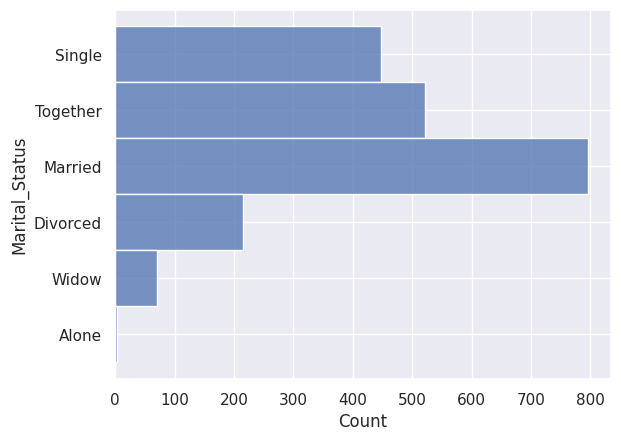

In [30]:
sns.histplot(y=df["Marital_Status"])

Sans plus d'information, "Alone" est une autre formulation de "Single", on décide donc de remplacer "Alone" par "Single".

In [31]:
df.loc[df["Marital_Status"] == "Alone", "Marital_Status"] = "Single"

<Axes: xlabel='Count', ylabel='Marital_Status'>

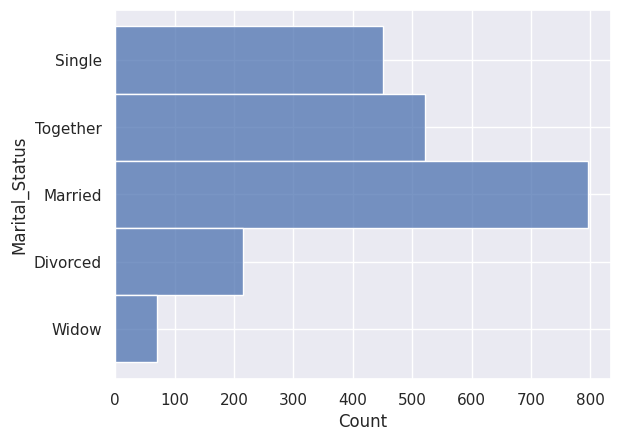

In [32]:
sns.histplot(y=df["Marital_Status"])

## Valeurs extrêmes

### Income

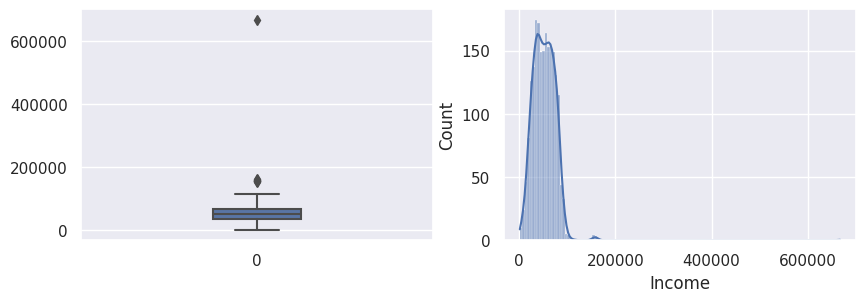

In [33]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

In [34]:
# todo: texte pour commenter

In [35]:
df["Income"][df["Income"] > 200_000]

ID
9432    666666.0
Name: Income, dtype: float64

In [36]:
# todo(ab2): écrire un texte, du style : Pour nous, il s'agit d'une valeur aberrante à supprimer du jeu de données car "666 666" ne semble pas être une valeur réelle (6 fois le nombre 6...)

In [37]:
df.drop(index=df[df["Income"] > 200_000].index, inplace=True)

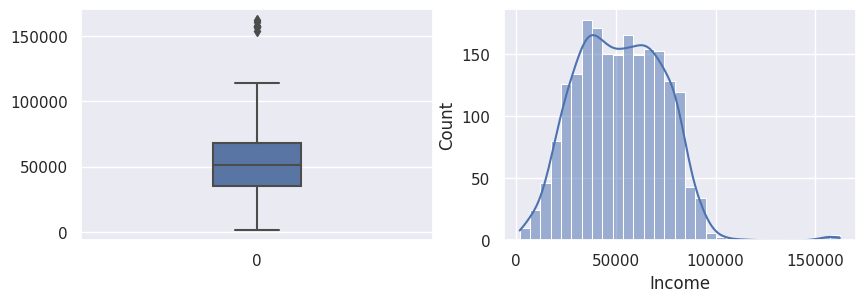

In [38]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

In [39]:
# todo: est-ce qu'on retire les valeurs au-dessus de 120 000 ? comment on le justifie ?

In [40]:
df.drop(index=df[df["Income"] > 120_000].index, inplace=True)

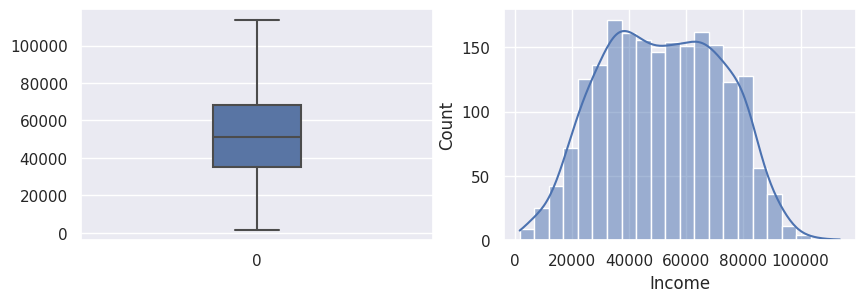

In [41]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

### Year Date

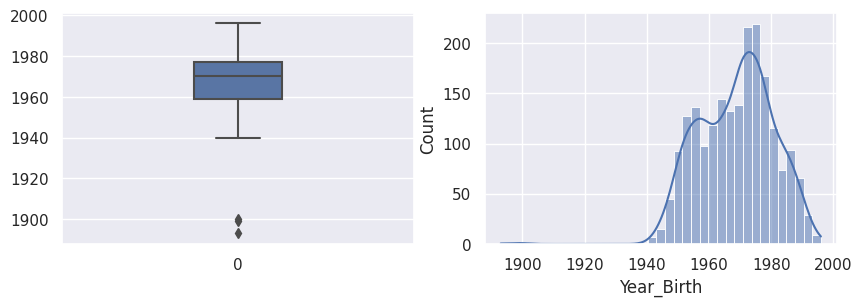

In [42]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Year_Birth"], width=0.25, ax=ax[0])
sns.histplot(df["Year_Birth"], kde=True, ax=ax[1])
plt.show()

In [43]:
df[df["Year_Birth"] < 1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,...,1,2,5,0,0,0,0,0,1,0
11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,...,0,2,4,0,0,0,0,0,0,0
1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,...,6,4,1,0,0,1,0,0,0,0


Comme les personnes les plus âgées au monde ont très rarement plus de 100 ans, et que nous sommes en 2023, on peut sans problème estimer que les trois dates de naissance avant 1920 sont erronées.

Pour les deux années 1893 et 1899, on peut s'imaginer que les personnes ont fait une faute de frappe, et voulaient écrire, respectivement, 1983 et 1989.

In [44]:
df.loc[df["Year_Birth"] == 1893, "Year_Birth"] = 1983
df.loc[df["Year_Birth"] == 1899, "Year_Birth"] = 1989

Pour l'année 1900, il est difficile d'imaginer une faute de frappe, il s'agit peut-être de la valeur par défaut.
On peut tout simplement supprimer la ligne correspondante.

In [45]:
df.drop(index=df.loc[df["Year_Birth"] == 1900, "Year_Birth"].index, inplace=True)

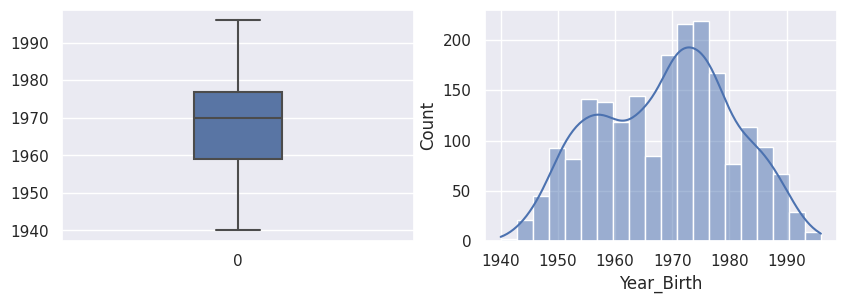

In [46]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Year_Birth"], width=0.25, ax=ax[0])
sns.histplot(df["Year_Birth"], kde=True, ax=ax[1])
plt.show()

## Valeurs manquantes

In [ ]:
# todo : explications etc

In [40]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [41]:
df["Income"][df["Income"].isna()]

ID
1994    NaN
5255    NaN
7281    NaN
7244    NaN
8557    NaN
10629   NaN
8996    NaN
9235    NaN
5798    NaN
8268    NaN
1295    NaN
2437    NaN
2863    NaN
10475   NaN
2902    NaN
4345    NaN
3769    NaN
7187    NaN
1612    NaN
5079    NaN
10339   NaN
3117    NaN
5250    NaN
8720    NaN
Name: Income, dtype: float64

In [42]:
# TODO: supprimer valeurs manquantes OU remplacer par la moyenne ?

In [43]:
# todo: expliquer POURQUOI ces données sont manquantes (notre hypothèse du moins), et expliquer notre démarche en conséquence

### Remplacement par la moyenne

In [14]:
# TODO: vérifier que le code ci-dessous fonctionne bien (pour l'instant je l'ai juste copié/collé au bon endroit)

In [15]:
income_mean = df["Income"].mean()

df_filtered = df[df["Income"].isna()]
df_filtered["Income"] = np.repeat(income_mean, 24)

df[df["Income"].isna()] = df_filtered
# Vérification du bon remplacement des valeurs manquantes
df[df["Income"].isna()].head()

/tmp/ipykernel_36480/20029480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Income'] = np.repeat(income_mean, 24)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,


In [16]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Year_Birth                Axes(0.125,0.11;0.0407895x0.77)
Income                 Axes(0.173947,0.11;0.0407895x0.77)
Kidhome                Axes(0.222895,0.11;0.0407895x0.77)
Teenhome               Axes(0.271842,0.11;0.0407895x0.77)
Recency                Axes(0.320789,0.11;0.0407895x0.77)
MntWines               Axes(0.369737,0.11;0.0407895x0.77)
MntFruits              Axes(0.418684,0.11;0.0407895x0.77)
MntMeatProducts        Axes(0.467632,0.11;0.0407895x0.77)
MntFishProducts        Axes(0.516579,0.11;0.0407895x0.77)
MntSweetProducts       Axes(0.565526,0.11;0.0407895x0.77)
MntGoldProds           Axes(0.614474,0.11;0.0407895x0.77)
NumDealsPurchases      Axes(0.663421,0.11;0.0407895x0.77)
NumWebPurchases        Axes(0.712368,0.11;0.0407895x0.77)
NumCatalogPurchases    Axes(0.761316,0.11;0.0407895x0.77)
NumStorePurchases      Axes(0.810263,0.11;0.0407895x0.77)
NumWebVisitsMonth      Axes(0.859211,0.11;0.0407895x0.77)
dtype: object

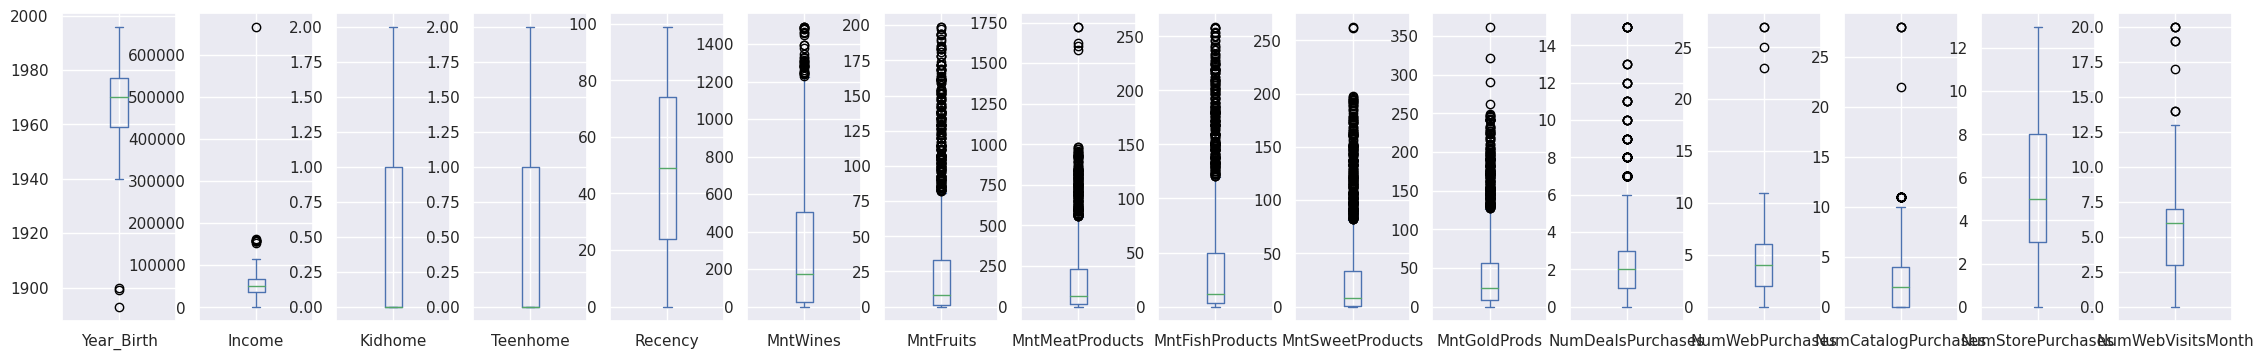

In [17]:
df[var_numeriques].plot(kind="box", subplots=True, sharey=False, figsize=(28, 4))

array([[<Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>],
       [<Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>],
       [<Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>]], dtype=object)

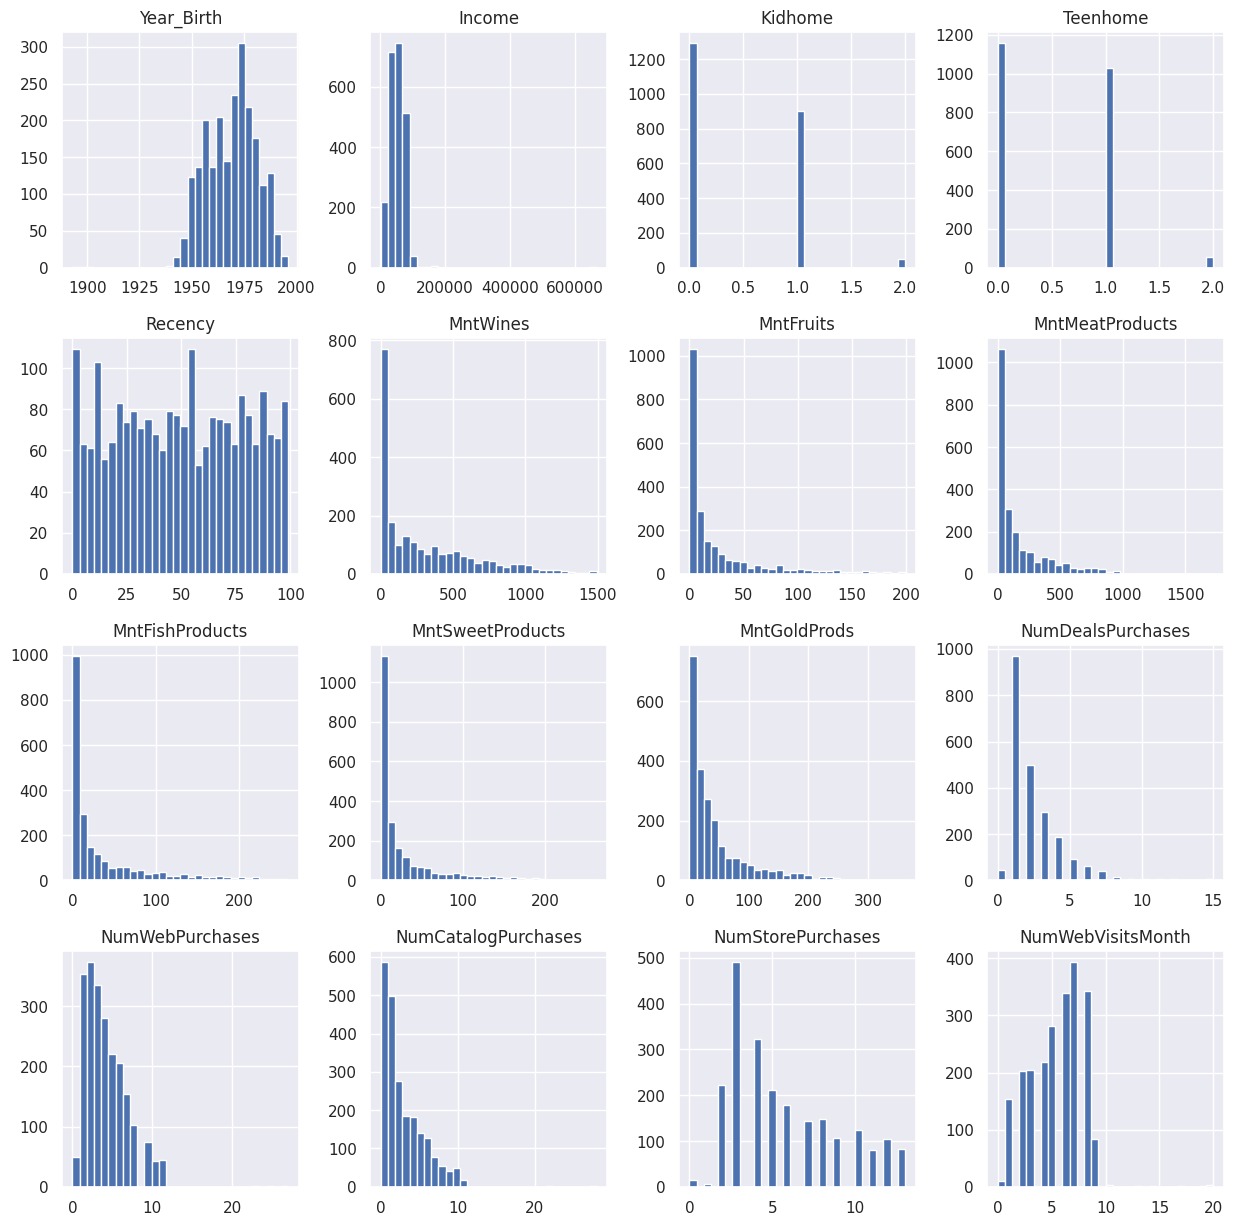

In [18]:
df[var_numeriques].hist(figsize=(15, 15), bins=30)

array([[<Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'AcceptedCmp1'}>,
        <Axes: title={'center': 'AcceptedCmp2'}>],
       [<Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedCmp5'}>],
       [<Axes: title={'center': 'Response'}>, <Axes: >, <Axes: >]],
      dtype=object)

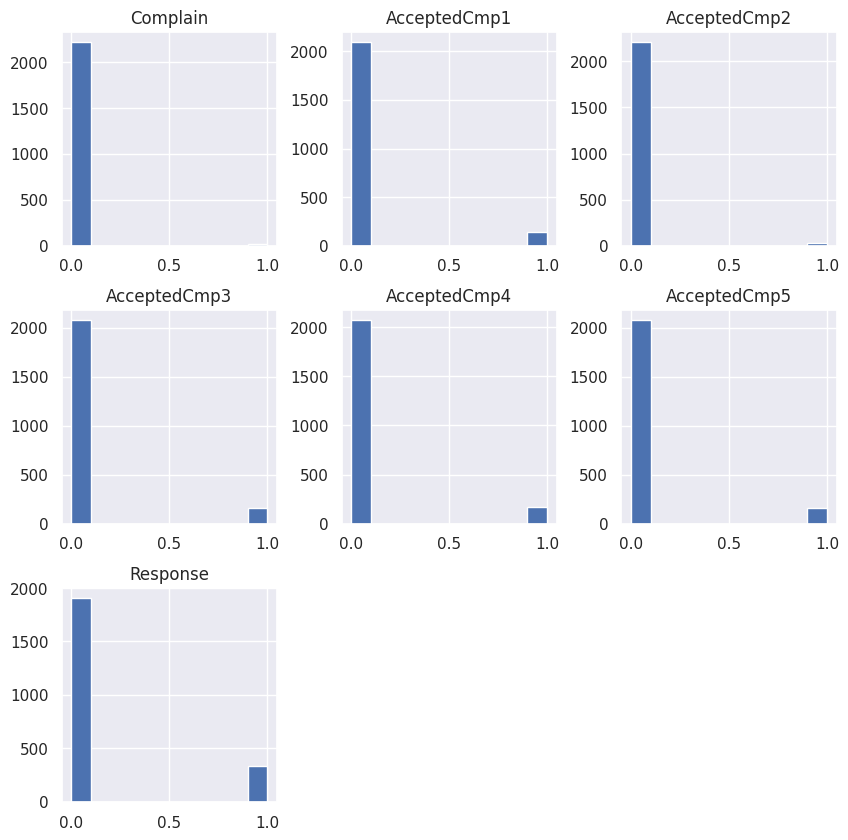

In [19]:
df[var_categoriques].hist(figsize=(10, 10))

/tmp/ipykernel_36480/3053955060.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


<Axes: >

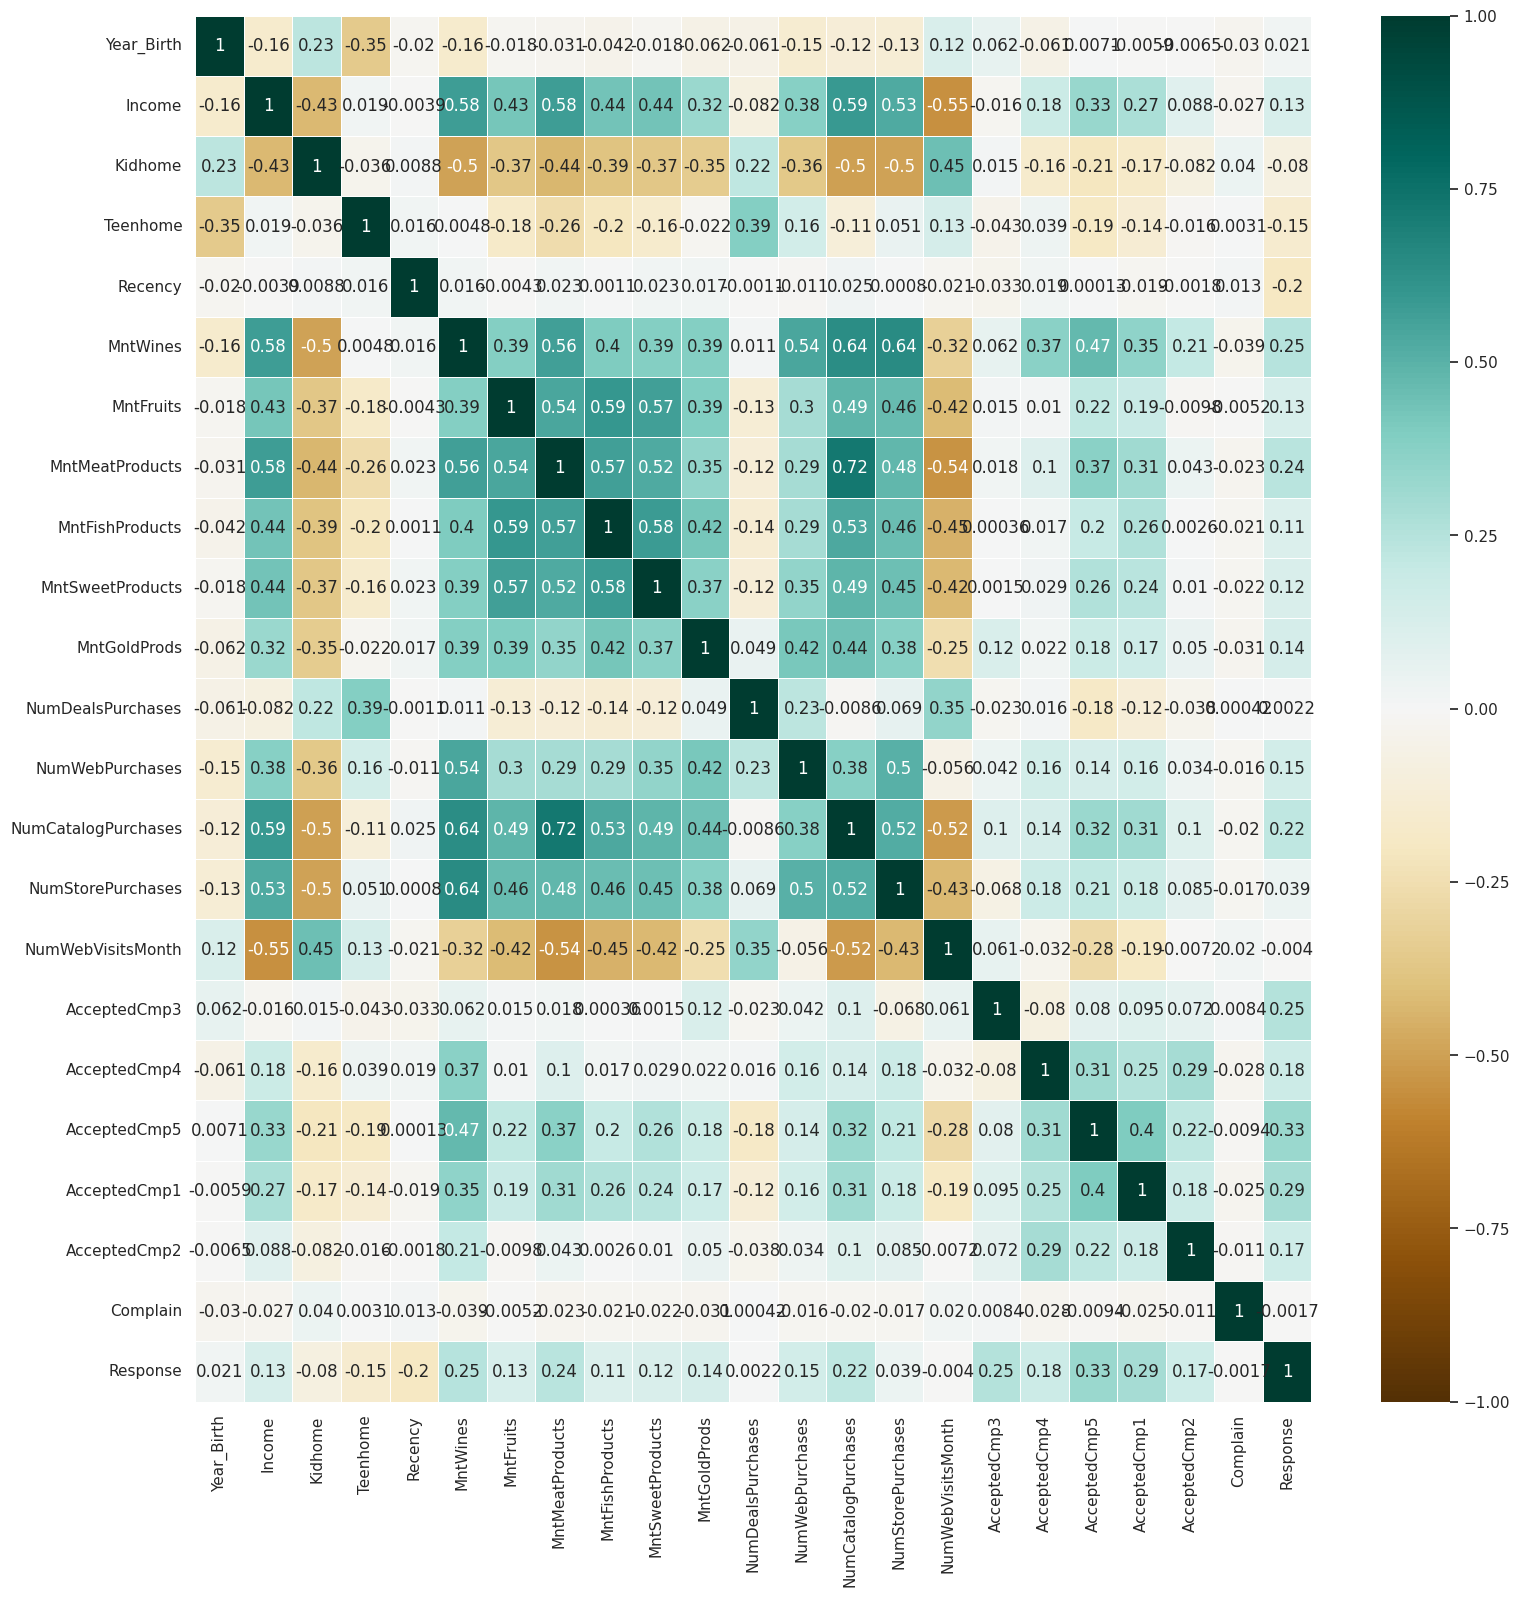

In [20]:
plt.figure(figsize=(18, 18))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="BrBG",
    vmax=1,
    vmin=-1,
    linewidths=0.5,
)

# Visualisation

In [44]:
# todo: renommer cette partie ? / mettre un texte introductif pour expliquer la démarche ("Une fois les données nettoyées, on les explore de nouveau, plus en profondeur")

In [80]:
# todo: organiser en plusieurs sous-parties

In [ ]:
# todo: choisir les représentations les plus pertinentes à montrer ci-dessous

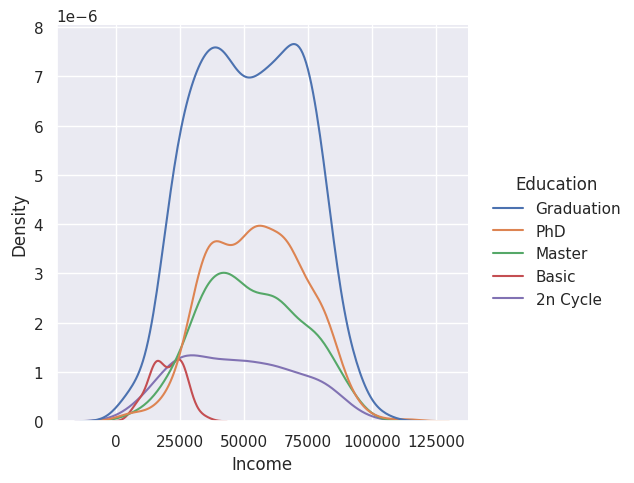

In [45]:
sns.displot(df, x="Income", hue="Education", kind="kde")

<Axes: xlabel='Income', ylabel='MntMeatProducts'>

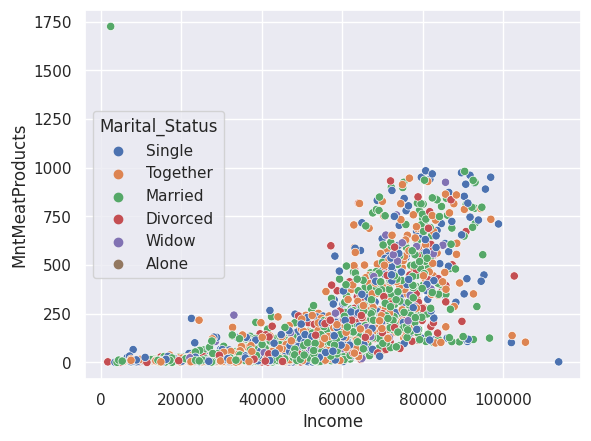

In [46]:
sns.scatterplot(data=df, x="Income", y="MntMeatProducts", hue="Marital_Status")

<Axes: xlabel='Education', ylabel='Count'>

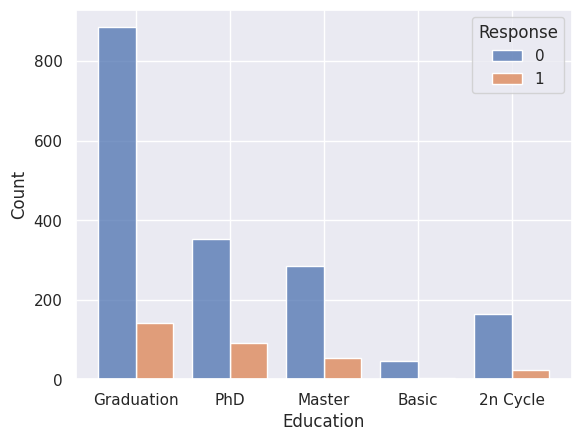

In [66]:
sns.histplot(data=df, x="Education", hue="Response", multiple="dodge", shrink=0.8)

<Axes: xlabel='Education', ylabel='Count'>

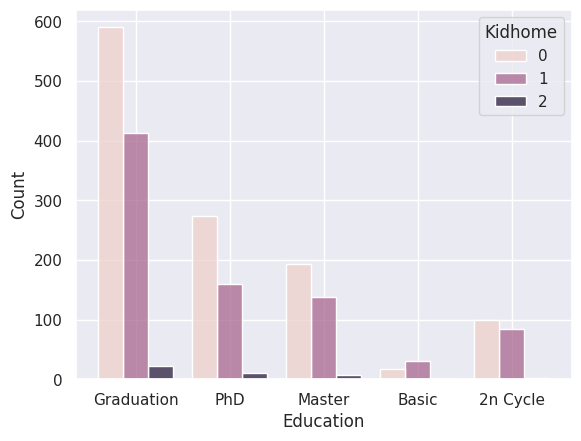

In [67]:
sns.histplot(data=df, x="Education", hue="Kidhome", multiple="dodge", shrink=0.8)

<Axes: xlabel='Marital_Status', ylabel='Count'>

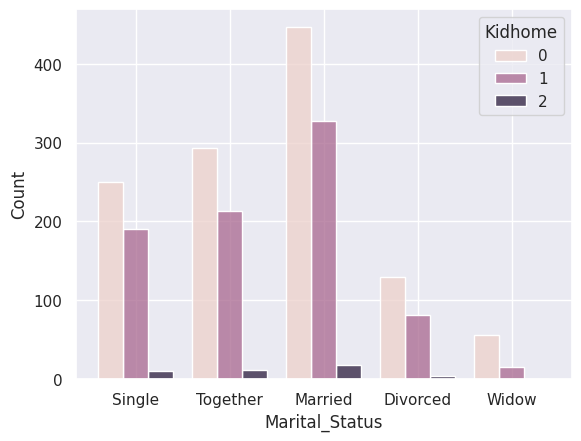

In [78]:
sns.histplot(data=df, x="Marital_Status", hue="Kidhome", multiple="dodge", shrink=0.8)

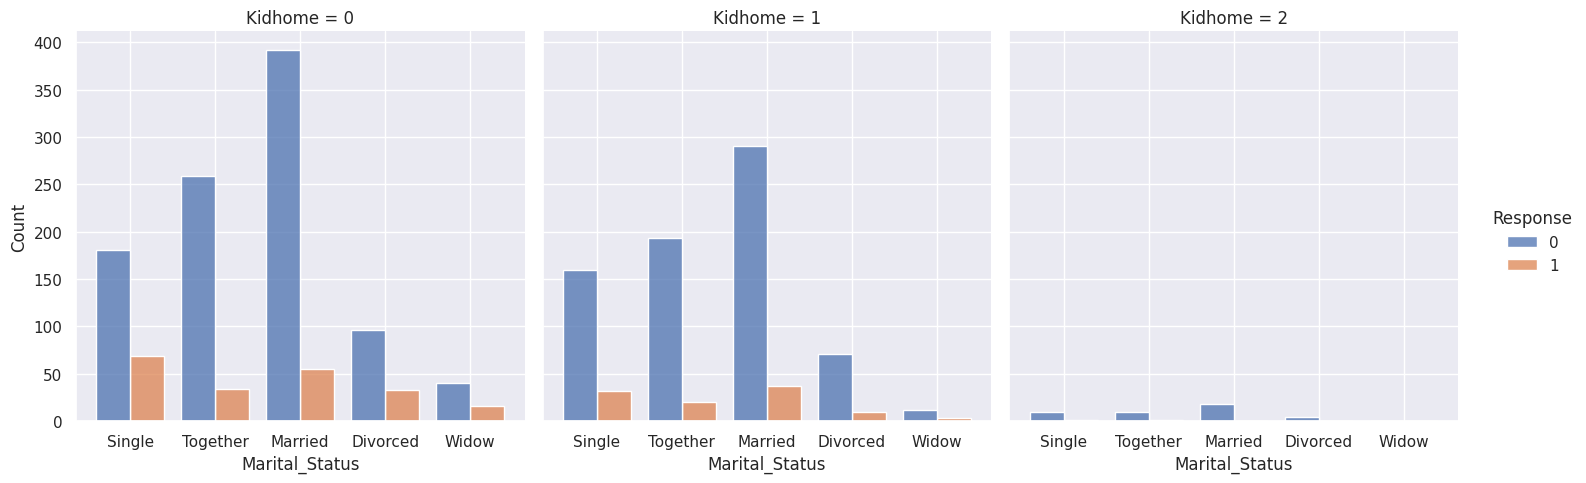

In [88]:
sns.displot(
    data=df,
    x="Marital_Status",
    hue="Response",
    col="Kidhome",
    multiple="dodge",
    shrink=0.8,
)

<Axes: xlabel='Education', ylabel='Count'>

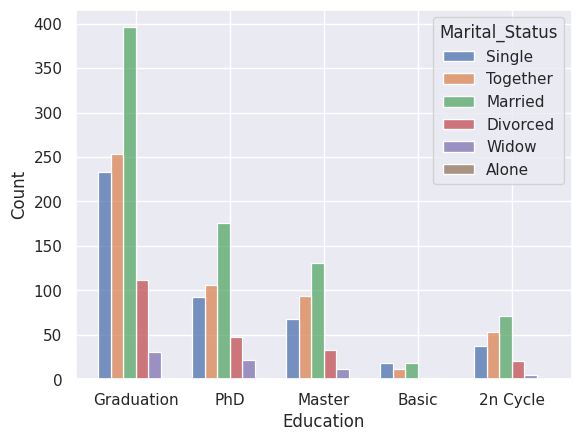

In [69]:
sns.histplot(data=df, x="Education", hue="Marital_Status", multiple="dodge", shrink=0.8)

# Transformation des données

In [96]:
df_transforme = df.copy()

## Mise à l'échelle (réduction ?)

### Explication

In [ ]:
# todo: expliquer pourquoi on a envie de le faire

### Sélection des variables

In [ ]:
# todo: sélectionner les variables à scaler

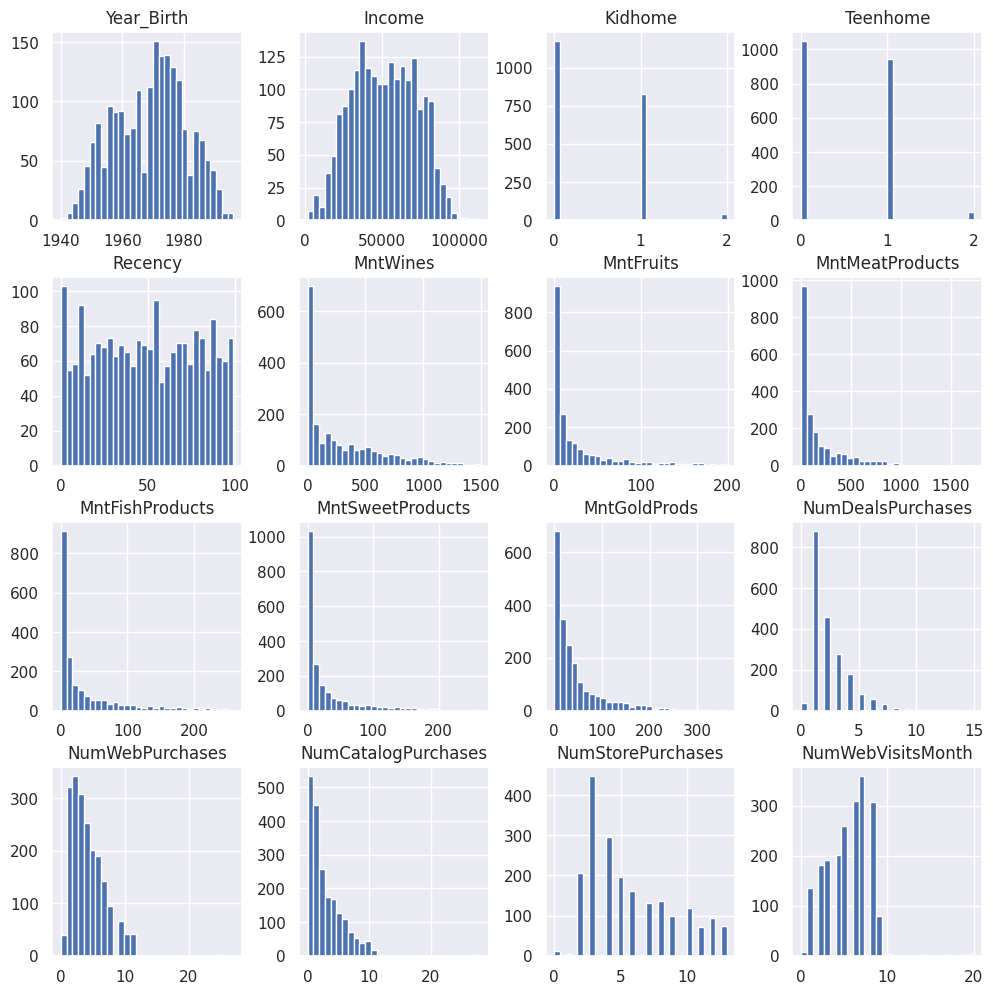

In [53]:
df[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

In [101]:
# todo(prof): est-ce que notre choix de variables est bon ?
var_a_scaler = [
    "Year_Birth",
    "Income",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
]

<Axes: >

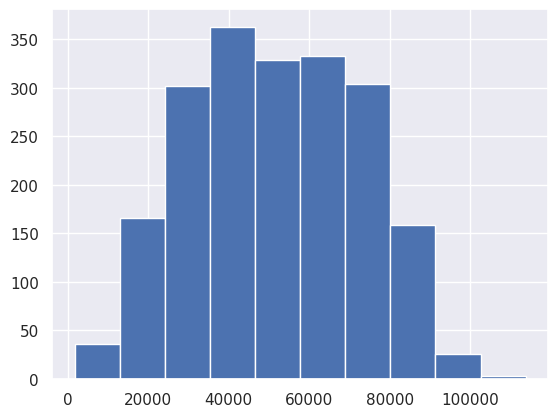

In [98]:
df["Income"].hist()

<Axes: >

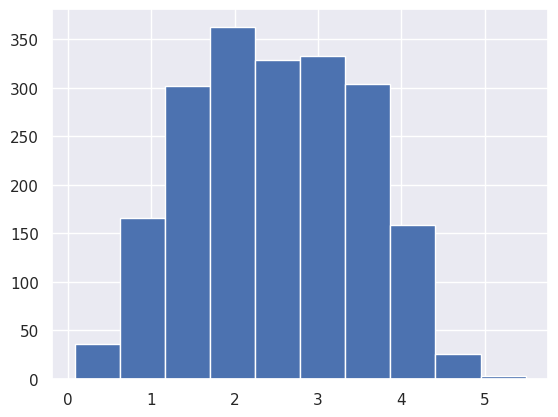

In [99]:
(df["Income"] / df["Income"].std()).hist()

In [107]:
for var in var_a_scaler:
    df_transforme[var] = df[var] / df[var].std()
    df_transforme[var] -= df_transforme[var].min()

### Conclusion

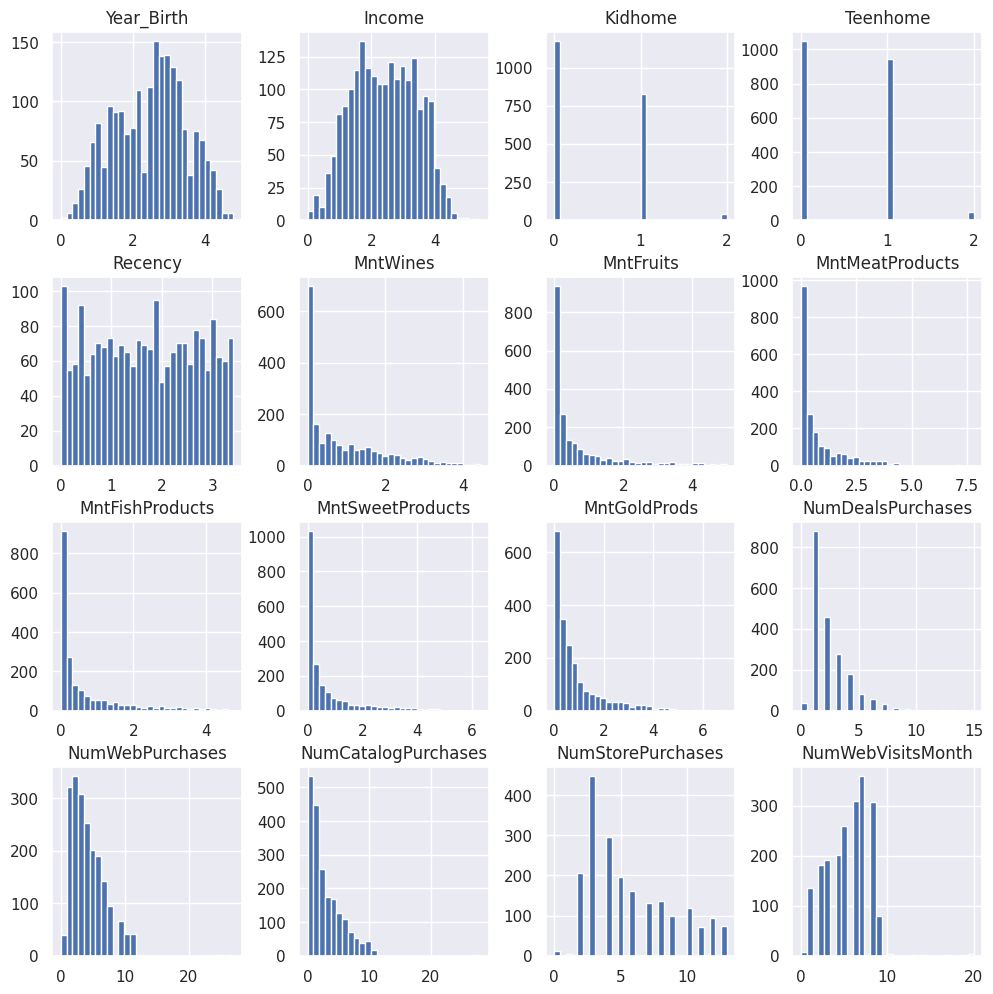

In [108]:
df_transforme[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

Les changements sur la matrice de corrélation sont de l'ordre de $10^{-15}$, donc extrêmement négligeables.

<Axes: >

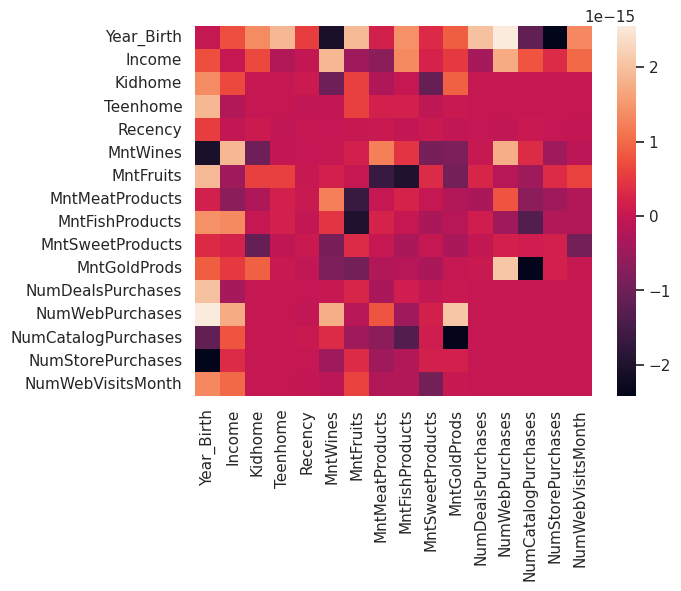

In [113]:
sns.heatmap(
    df_transforme[var_numeriques].corr() - df[var_numeriques].corr()
)

## Normalisation

### Explication

Pour normaliser les données, nous allons utiliser la transformation de Box-Cox, définie $\forall x > 0, $ comme ci-dessous :
$B(x, \lambda) = \begin{cases} \frac{x^{\lambda} - 1}{\lambda} & \text{  si } \lambda \neq 0 \\ \log(x) & \text{  si } \lambda = 0 \end{cases}$

Cette transformation est à appliquer à une variable (strictement positive), en ajustant le $\lambda$ pour maximiser la normalité.

Nous allons utiliser la librairie `scipy.stats.boxcox` qui estime le meilleur paramètre $\lambda$.

### Sélection des variables

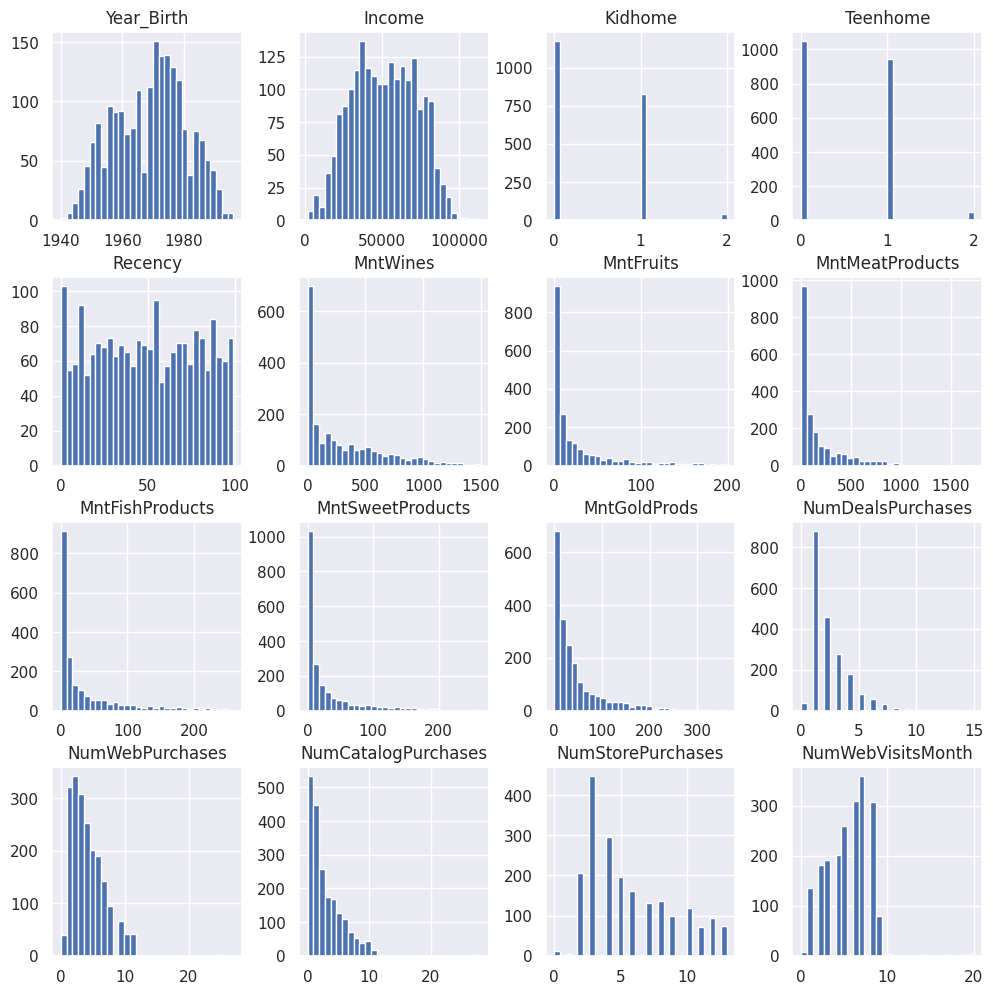

In [54]:
df[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

In [66]:
# todo(prof): faut-il inclure la distribution uniforme Recency ?
# todo(prof): est-ce que notre choix de variables est bon ?
var_a_normaliser = [
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
]

### Transformation

In [ ]:
# todo : faire une fonction qui parcourt toutes les variables sélectionnées et les transforme, et au passage stocke les lambdas

<Axes: xlabel='MntWines', ylabel='Count'>

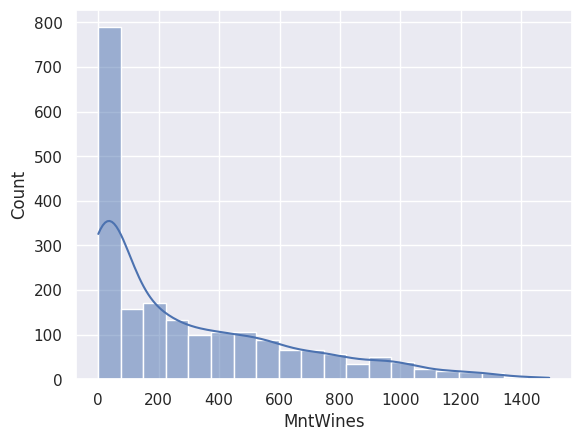

In [68]:
sns.histplot(df["MntWines"], kde=True)

In [69]:
from scipy.stats import boxcox

In [70]:
boxcox_lambdas = {}  # on garde les lambdas, pour la transformation inverse

In [79]:
for var in var_a_normaliser:
    var_strict_positif = df[var] + df[var].min() + 1
    var_apres_boxcox, l = boxcox(var_strict_positif)

    df_transforme[var] = pd.DataFrame(var_apres_boxcox)
    boxcox_lambdas[var] = l

In [72]:
# Tuto : comment récupérer la fonction initiale
# (il faut avoir récupéré le paramètre "l" lambda)

# from scipy.special import inv_boxcox
# initial = inv_boxcox(incbox, l)
# initial = pd.DataFrame(initial)
# sns.histplot(initial, bins=50, kde=True)

<Axes: xlabel='MntWines', ylabel='Count'>

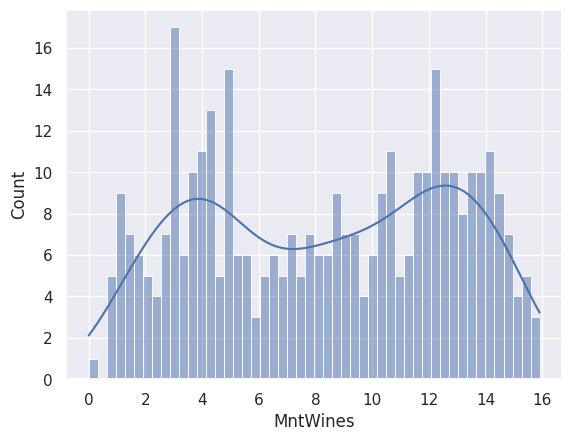

In [80]:
sns.histplot(df_transforme["MntWines"], bins=50, kde=True)

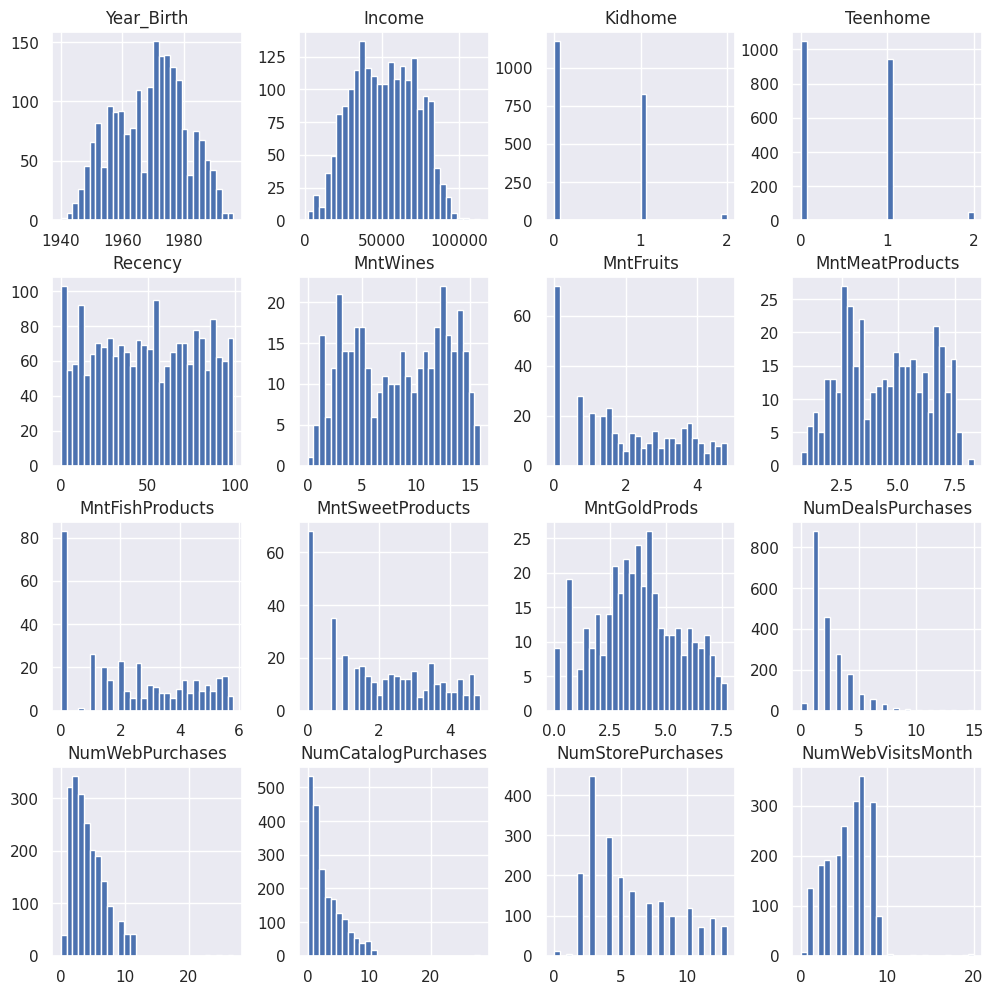

In [81]:
df_transforme[var_numeriques].hist(figsize=(12, 12), bins=30)
plt.show()

### Conclusion

In [ ]:
# todo: analyser les résultats, notamment l'impact sur la matrice de corrélation (du coup, mettre ci-dessous la matrice de corrélation pré-transformation et comparer)

<Axes: >

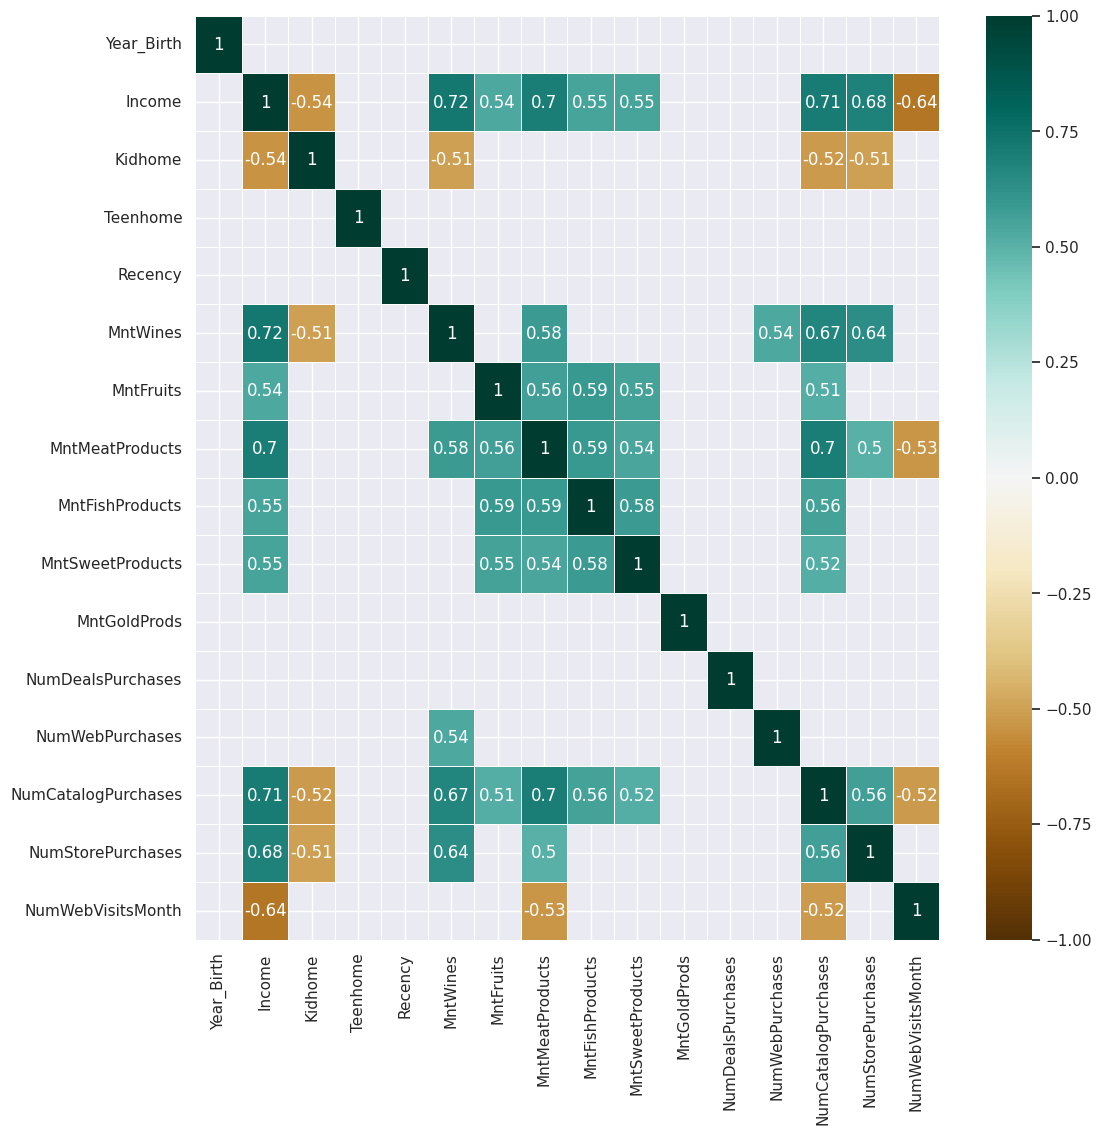

In [90]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df[var_numeriques].corr()[df[var_numeriques].corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

<Axes: >

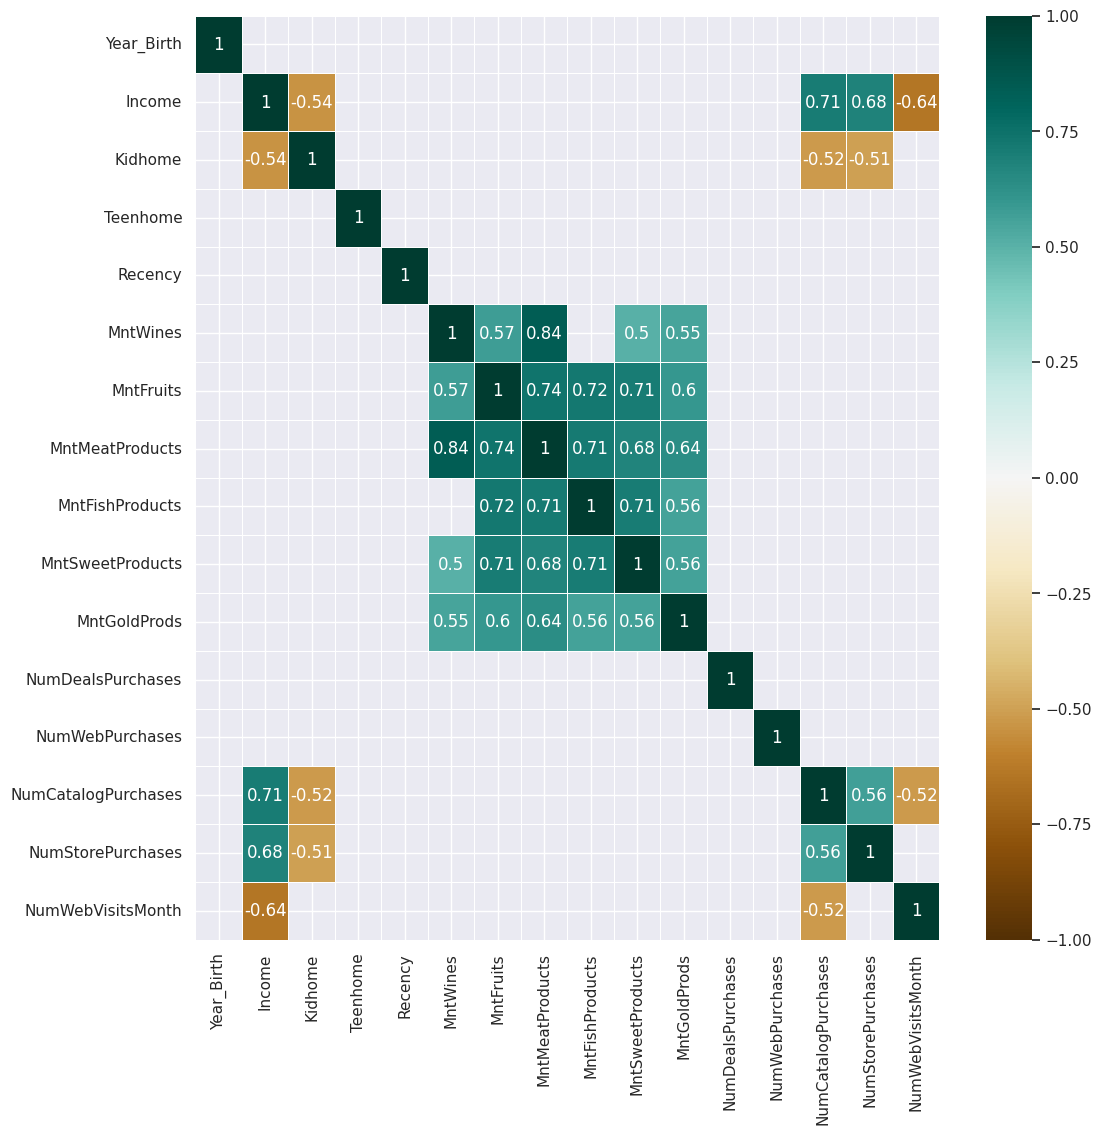

In [91]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df_transforme[var_numeriques].corr()[
        df_transforme[var_numeriques].corr().abs() > 0.5
    ],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

# Régression linéaire

## Hypothèses à vérifier pour entamer la régression linéaire
### Modèle simple : une variable à expliquer (Y) et une seule variable explicative (X)

1) coefficient de corrélation linéaire entre X et Y non nul

1) la distribution de l’erreur ε est indépendante de la variable X (exogénéité)  
cela implique que l'erreur est centrée i.e. E(ε) = 0

2) l’erreur est de variance constante (homoscédasticité)  
i.e Var(εi) = s, s une constante

3) les erreurs sont indépendantes (absence d'autocorrélation)  
i.e. Cov(εi, εj) = 0, pour tout i, j

4) si la distribution des erreurs suit une loi normale centrée, cette propriété est meilleure que les deux premières.

In [47]:
# TODO : calculer a la main les moindres carres ordinaires pour un
# modele simple, apres avoir verifier l'hyp 1 ci dessus.
# Puis faire la regression automatique avec une fonction python.